### Problem Statement:-
    
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state

### Company Wants to know:-
    1.Which factors are affecting the shared bike demand in American Market
    2.How well those variables describe the bike demands or rather how significant it is

### Goal:-
    1.Develop a linear model which are which describes the effect of various features on the demand of shared Bikes
    2.As the management will make their Business Decision and create their profitable business strategy depending on the       model,so the model must be understandable and interpretable

# Step 1-Data Loading and Understanding

In [4]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing required libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [7]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df.shape

(730, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


###### This Bike Sharing Dataset is having no null values with 730 rows and 16 columns. so there is no need to find out the missing values or the outliers.

In [10]:
#dropping the unwanted column-
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)


In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


# Step2-Pre-Processing Step

In [12]:
#Mapping with original Season Column
df.season =df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [13]:
#Mapping with original month Column
df.mnth =df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [14]:
#Mapping with original Season Column
df.weekday =df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [15]:
#Mapping with original Season Column
df.weathersit =df.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'})

In [16]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
df.shape

(730, 12)

### Our Target variable is 'cnt'.So depending on that we will do the below Exploratory Data Analysis

## Step 3- EDA

In [18]:
#Checking the seasonal impact on the total counts of rental bikes
round(df.groupby('season')['cnt'].sum()/df.cnt.sum()*100,2)

season
fall      32.24
spring    14.27
summer    27.91
winter    25.57
Name: cnt, dtype: float64

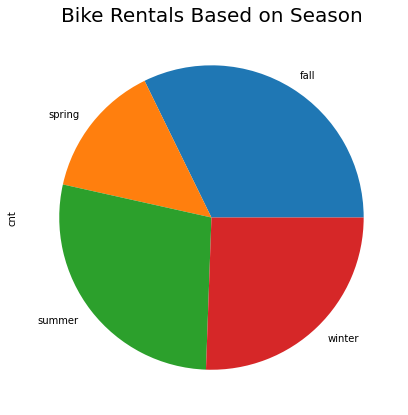

In [19]:
# Ploting a pie chart for better visualisation
plt.figure(figsize=(7,7))
df.groupby(["season"])["cnt"].sum().plot.pie()
plt.title("Bike Rentals Based on Season",fontsize=20)
plt.show()

### So from the chart clearly visible that in the season of Fall Bike Rental is highest and in Spring Bike Rental is lowest 

In [20]:
round(df.groupby('yr')['cnt'].sum()/df.cnt.sum()*100,2)

yr
0    37.77
1    62.23
Name: cnt, dtype: float64

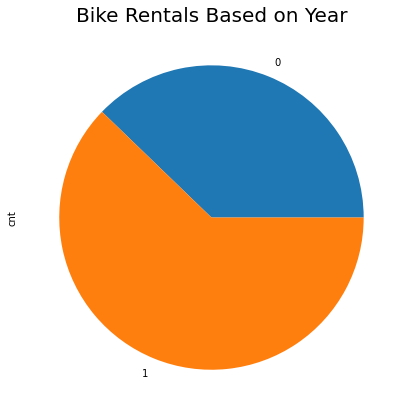

In [21]:
plt.figure(figsize=(7,7))
df.groupby(["yr"])["cnt"].sum().plot.pie()
plt.title("Bike Rentals Based on Year",fontsize=20)
plt.show()

### So from the chart clearly visible that Bike Rental has significantly increased from 2018 to 2019

In [22]:
round(df.groupby('mnth')['cnt'].sum()/df.cnt.sum()*100,2)

mnth
apr      8.18
aug     10.67
dec      6.41
feb      4.54
jan      4.10
july    10.48
june    10.52
mar      6.96
may     10.08
nov      7.74
oct      9.80
sep     10.51
Name: cnt, dtype: float64

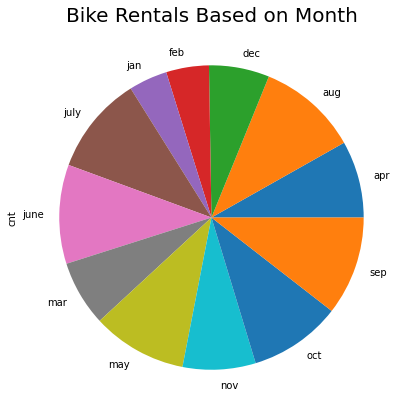

In [23]:
plt.figure(figsize=(7,7))
df.groupby(["mnth"])["cnt"].sum().plot.pie()
plt.title("Bike Rentals Based on Month",fontsize=20)
plt.show()

### So from the month of April to October more than 80% Bike Rental happen

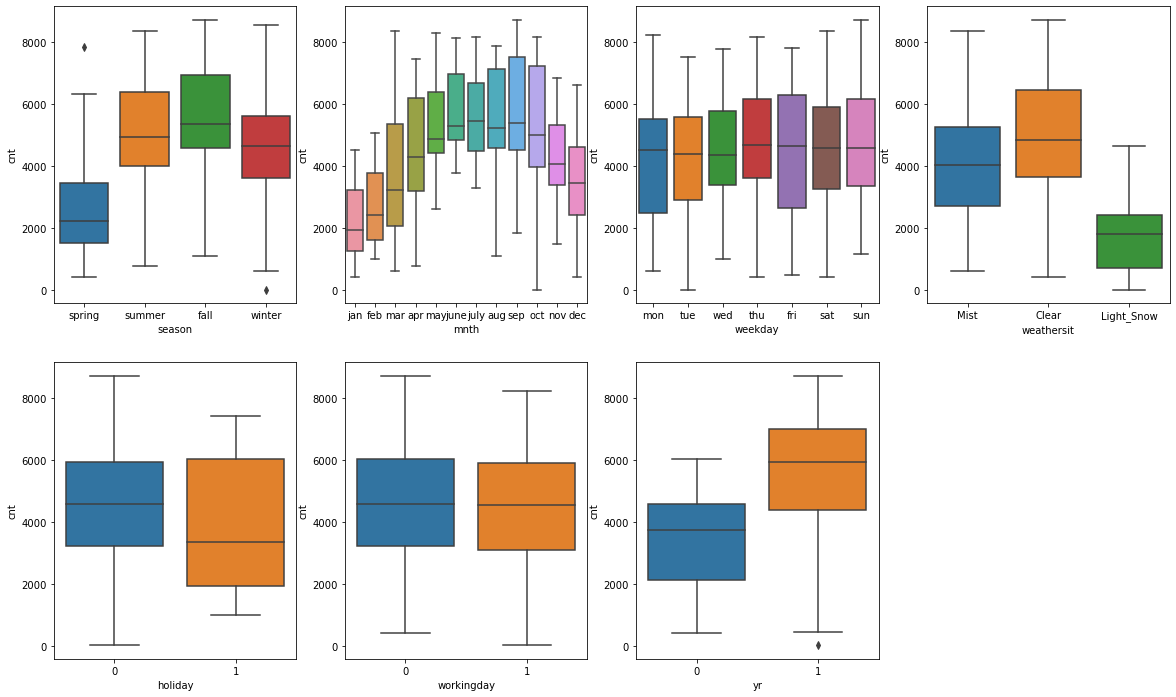

In [24]:

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

<Figure size 1440x1080 with 0 Axes>

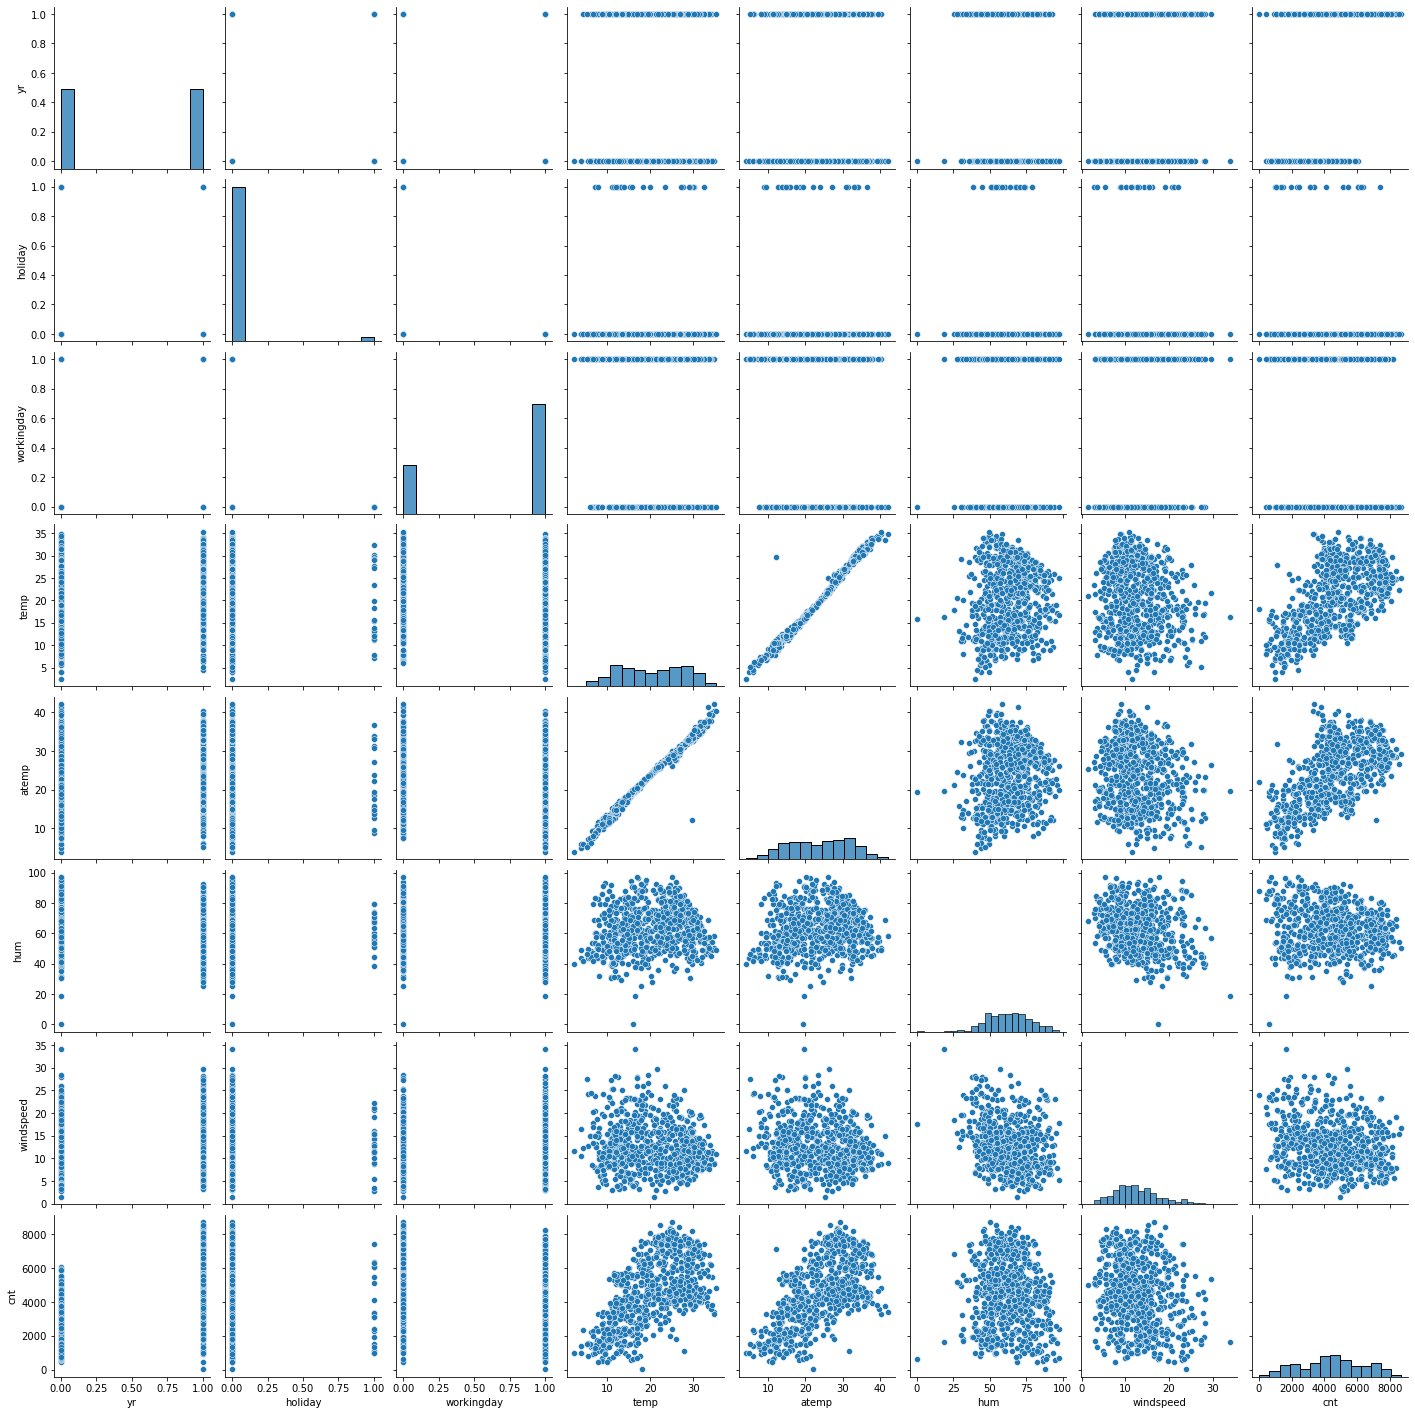

In [25]:
#Pairplots to understand the correlations of the variables
plt.figure(figsize=(20,15))
sns.pairplot(df)
plt.show()

In [26]:
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


### From the Pairplot and correlation it is very much clear that temp and atemp is highly correlated.so we will drop one.

In [27]:
# Dropping the atemp column 
df.drop('atemp',axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,43.6957,12.522300,1600


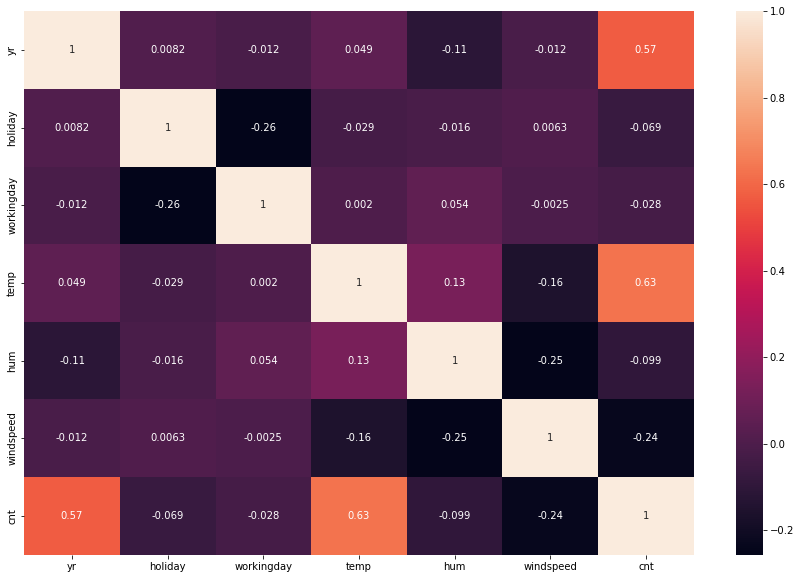

In [28]:
#Calculating Correlation
df_corr = df.corr()
plt.figure(figsize=(15,10))

#Drawing Heatmap of correlation
sns.heatmap(df_corr,annot=True, )
plt.show()

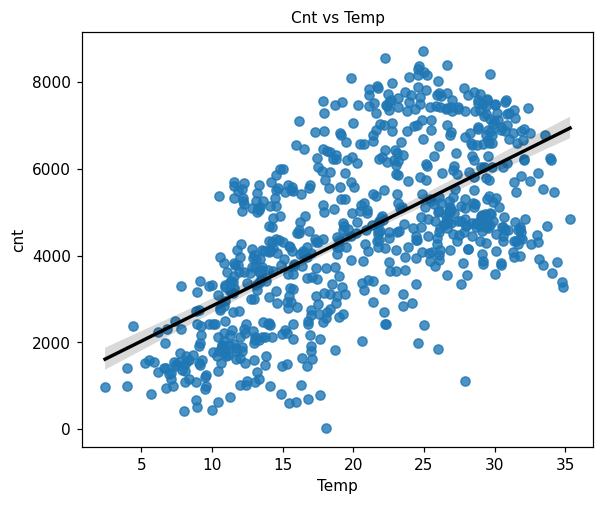

In [29]:
# Checking with regplot the correlation of cnt vs temp
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=10)
sns.regplot(data=df,y="cnt",x="temp",line_kws={"color": "black"})
plt.xlabel("Temp")
plt.show()

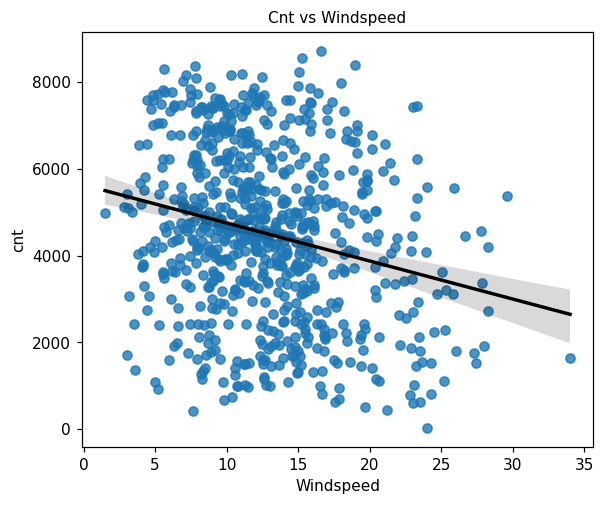

In [30]:
# Checking with regplot the correlation of cnt vs windspeed
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=10)
sns.regplot(data=df,y="cnt",x="windspeed",line_kws={"color": "black"})
plt.xlabel("Windspeed")
plt.show()

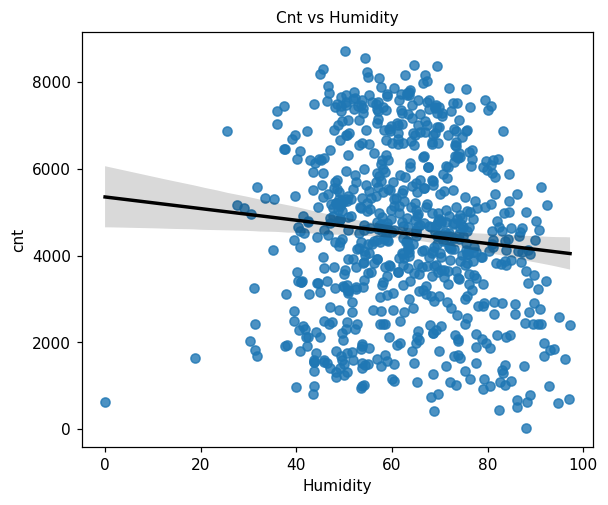

In [31]:
# Checking with regplot the correlation of cnt vs humidity
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Humidity",fontsize=10)
sns.regplot(data=df,y="cnt",x="hum",line_kws={"color": "black"})
plt.xlabel("Humidity")
plt.show()

# Step 4- Data Preperation

Dropping the first columns as (n-1) dummies can explain n categories.

In [32]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [33]:
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# Step 5- Splitting Data into Train & Test

In [34]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7,test_size = 0.2, random_state = 100)

In [35]:
df_train.shape

(510, 30)

In [36]:
df_test.shape

(146, 30)

In [37]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
367,1,0,1,6.150000,44.1250,24.499957,2236,1,0,0,...,0,0,0,0,1,0,0,1,0,0
648,1,0,1,17.835000,46.3333,12.166932,7570,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44,0,0,1,17.015000,37.5833,27.999836,1913,1,0,0,...,0,0,0,0,0,0,1,1,0,0
705,1,0,0,13.154153,76.4167,8.750200,5008,0,0,1,...,0,0,1,0,0,0,0,0,0,1
379,1,0,1,6.833347,41.9167,16.834286,2311,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [38]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
184,0,1,0,29.793347,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,32.082500,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,19.270000,81.2917,13.250121,2659,0,0,1,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,31.433347,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,29.315000,30.5000,19.583229,4968,0,1,0,...,0,0,1,0,0,0,0,1,0,0


# Step-6 Scaling

Doing scaling (same scaling) on 'temp','hum','windspeed' on these features so that it will easily understandable and as wel interpretable

In [39]:
### Scaling the model
scaled_var = ['temp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[scaled_var] = scaler.fit_transform(df_train[scaled_var])


In [40]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
367,1,0,1,0.113228,0.238153,0.851031,2236,1,0,0,...,0,0,0,0,1,0,0,1,0,0
648,1,0,1,0.468352,0.269946,0.366586,7570,0,0,1,...,0,0,0,0,0,0,0,1,0,0
44,0,0,1,0.443431,0.143971,0.988507,1913,1,0,0,...,0,0,0,0,0,0,1,1,0,0
705,1,0,0,0.326094,0.703060,0.232375,5008,0,0,1,...,0,0,1,0,0,0,0,0,0,1
379,1,0,1,0.133996,0.206359,0.549921,2311,1,0,0,...,0,0,0,0,0,1,0,1,0,0


In [41]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.523529,0.029412,0.719608,0.538869,0.516475,0.388898,4528.945098,0.247059,0.24902,0.252941,...,0.086275,0.158824,0.113725,0.141176,0.143137,0.162745,0.125490,0.629412,0.029412,0.341176
std,0.499936,0.169124,0.449632,0.223764,0.196744,0.201416,1924.012861,0.431725,0.43287,0.435124,...,0.281045,0.365870,0.317789,0.348545,0.350557,0.369495,0.331599,0.483437,0.169124,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344266,0.354679,0.246278,3191.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.518896,0.359232,4582.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.736253,0.653719,0.497316,5990.500000,0.000000,0.00000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Deviding train data into X & Y

In [42]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

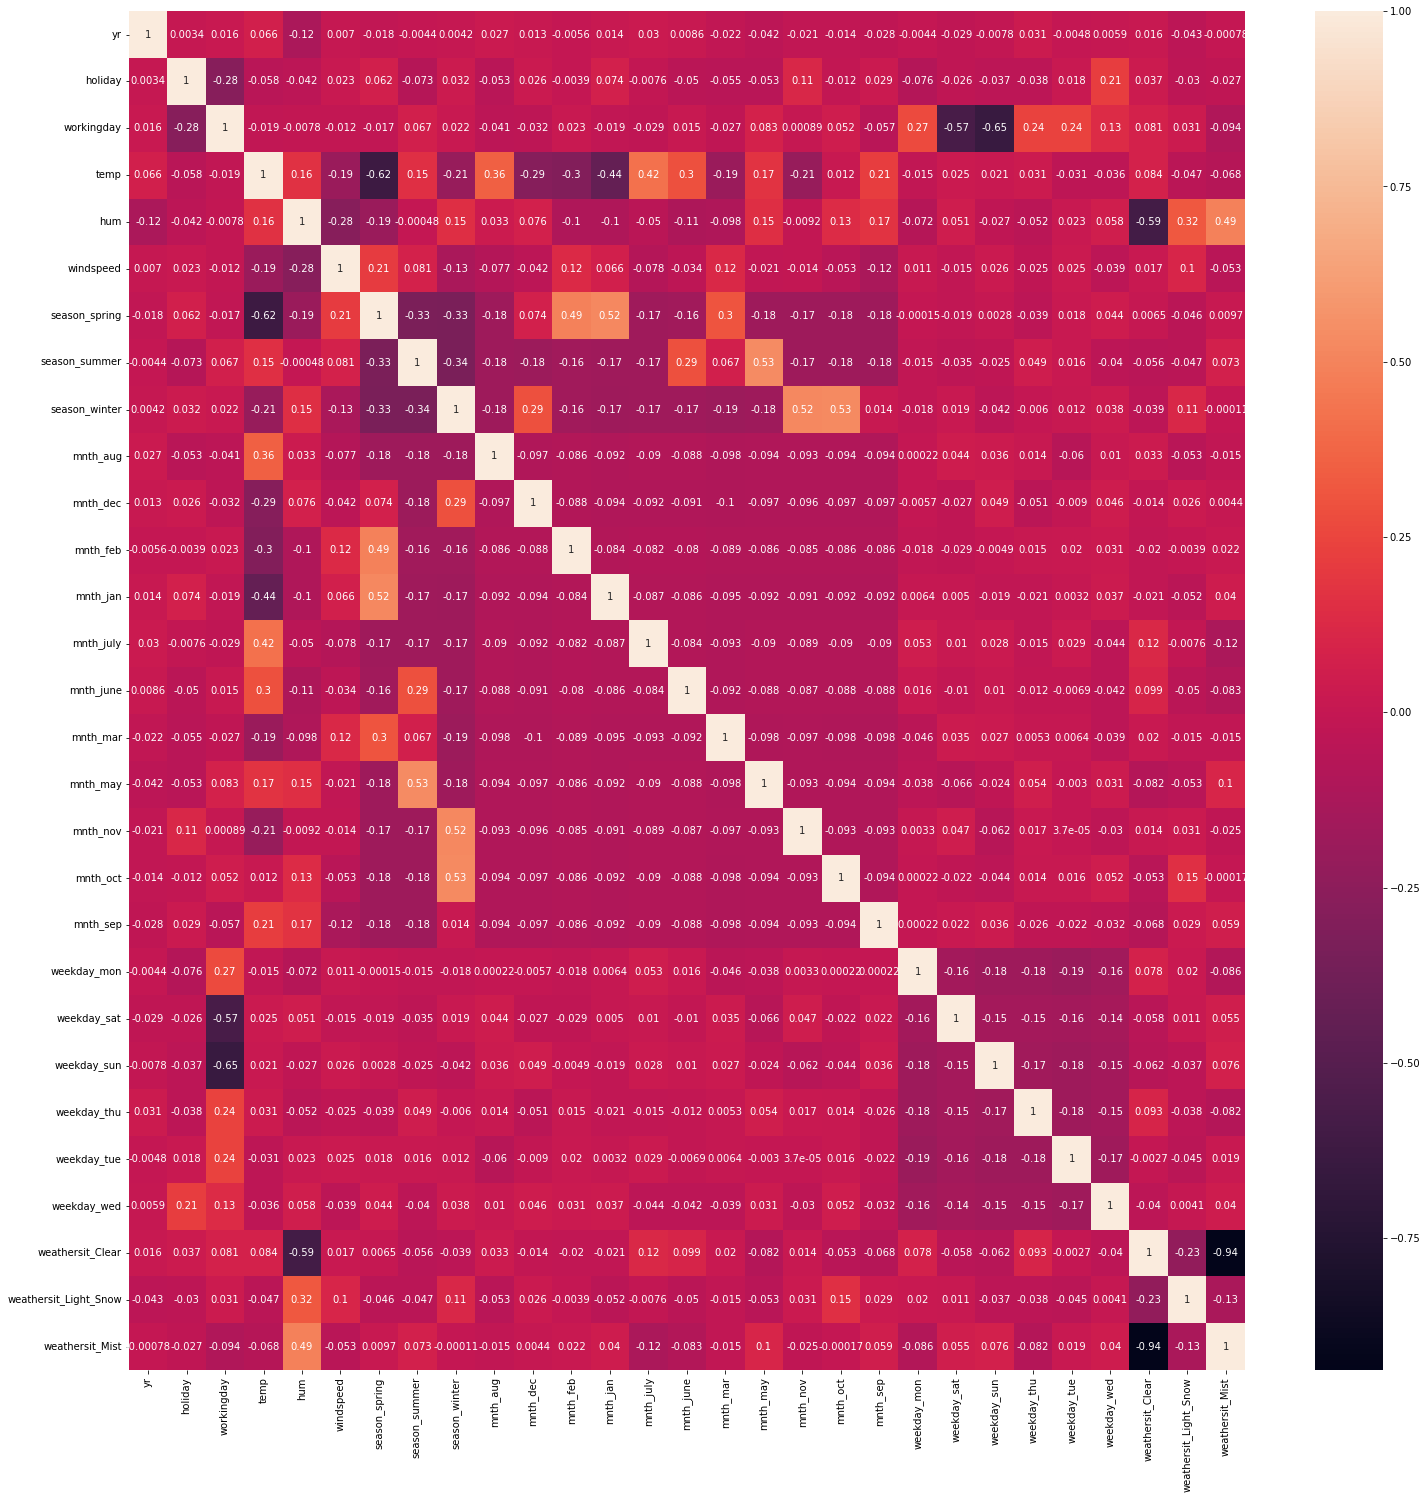

In [43]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (25,25))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

### Use RFE to eliminate some feature column in an automated way.

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [45]:
# We have already imported the required libraries
# Running RFE -variable equal to 20

lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm, 20)             
rfe = rfe.fit(X_train, y_train)

In [46]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_july', True, 1),
 ('mnth_june', False, 7),
 ('mnth_mar', False, 8),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sep', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 3),
 ('weekday_thu', False, 10),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 9),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [47]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon', 'weekday_sat',
       'weekday_tue', 'weathersit_Clear', 'weathersit_Light_Snow',
       'weathersit_Mist'],
      dtype='object')


In [48]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_aug', 'mnth_june', 'mnth_mar', 'mnth_may',
       'mnth_oct', 'weekday_sun', 'weekday_thu', 'weekday_wed'],
      dtype='object')

### Manual Elimination(VIF and P value check)

In [49]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def create_model(cols):
    X_train_rfe = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_rfe).fit()
    print(lm.summary())
    return lm

In [50]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def calculate_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

### Creating Model -1

###### Checking on the basis of below parameter
###### P value <0.05
###### VIF < 5


In [51]:
#Selected columns for Model 1 - all columns selected from RFE
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon', 'weekday_sat',
       'weekday_tue', 'weathersit_Clear', 'weathersit_Light_Snow',
       'weathersit_Mist']

create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     149.0
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.23e-189
Time:                        07:35:06   Log-Likelihood:                -4091.9
No. Observations:                 510   AIC:                             8224.
Df Residuals:                     490   BIC:                             8308.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1359.05

### Creating Model-2

In [52]:
# Dropping the variable weekday_sat as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Clear', 'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.09e-190
Time:                        07:35:06   Log-Likelihood:                -4092.0
No. Observations:                 510   AIC:                             8222.
Df Residuals:                     491   BIC:                             8302.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1352.87

### Creating Model-3

In [53]:
# Dropping the variable mnth_feb as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Clear', 'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     166.1
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          3.12e-191
Time:                        07:35:06   Log-Likelihood:                -4093.4
No. Observations:                 510   AIC:                             8223.
Df Residuals:                     492   BIC:                             8299.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1289.84

### Creating Model-4

In [54]:
# Dropping the variable season_summer as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Clear', 'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.58e-191
Time:                        07:35:06   Log-Likelihood:                -4095.9
No. Observations:                 510   AIC:                             8226.
Df Residuals:                     493   BIC:                             8298.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1533.58

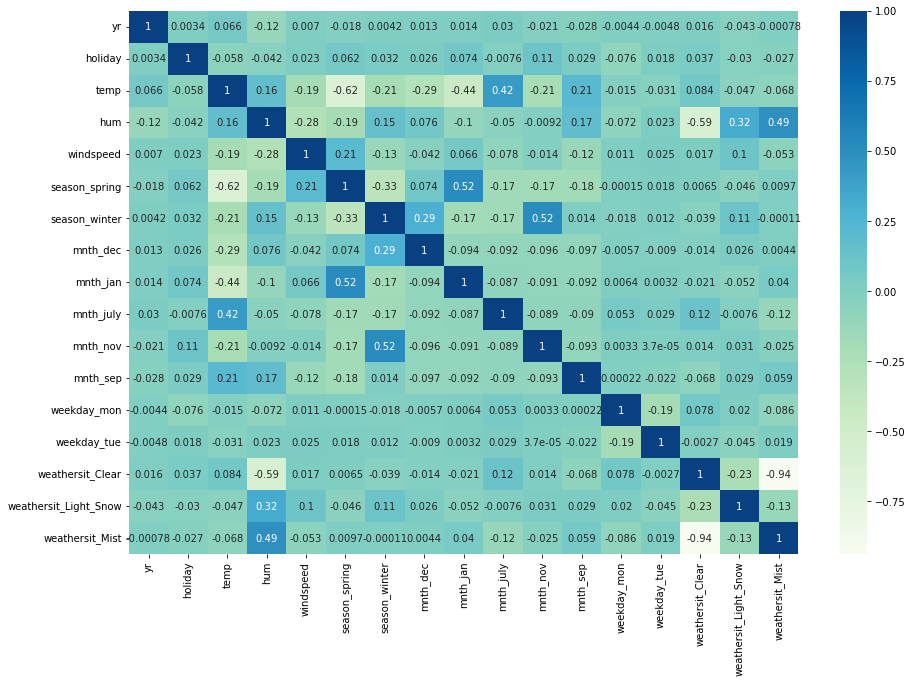

In [55]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Clear', 'weathersit_Light_Snow','weathersit_Mist']].corr(), cmap='GnBu', annot=True)
plt.show()

### Creating Model-5

In [56]:
#Now all the P value is 0.005 , so now lets try to remove look into VIF values
#weathersit_Clear is having high VIF and correlation is high negative value
#Removing weathersit_Clear
cols = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     174.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          2.58e-191
Time:                        07:35:09   Log-Likelihood:                -4095.9
No. Observations:                 510   AIC:                             8226.
Df Residuals:                     493   BIC:                             8298.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2976.13

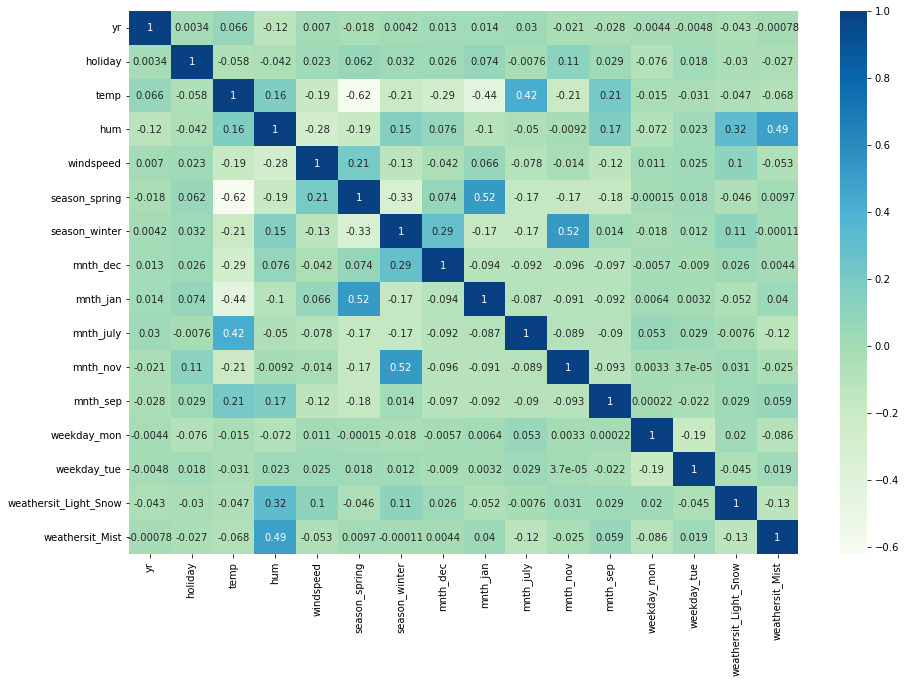

In [57]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df_train[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
         'weathersit_Light_Snow','weathersit_Mist']].corr(), cmap='GnBu', annot=True)
plt.show()

### Creating Model-6

In [58]:
#temp is having second high VIF and correlation is high negative value
#Removing temp
cols = ['yr', 'holiday', 'hum', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     133.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          6.67e-163
Time:                        07:35:10   Log-Likelihood:                -4166.5
No. Observations:                 510   AIC:                             8365.
Df Residuals:                     494   BIC:                             8433.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5017.77

### Creating Model-7

In [59]:
#hum is having second high VIF 
#Removing hum
cols = ['yr', 'holiday', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jan',
       'mnth_july', 'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     143.4
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          5.99e-164
Time:                        07:35:10   Log-Likelihood:                -4166.6
No. Observations:                 510   AIC:                             8363.
Df Residuals:                     495   BIC:                             8427.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5083.68

### Creating Model-8

In [60]:
##removing mnth_july 
cols = ['yr', 'holiday', 'windspeed', 'season_spring',
        'season_winter', 'mnth_dec', 'mnth_jan',
        'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          6.69e-165
Time:                        07:35:10   Log-Likelihood:                -4167.0
No. Observations:                 510   AIC:                             8362.
Df Residuals:                     496   BIC:                             8421.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5111.46

### Creating Model-9

In [61]:
##removing season_winter 
cols = ['yr', 'holiday', 'windspeed', 'season_spring',
         'mnth_dec', 'mnth_jan',
        'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Light_Snow','weathersit_Mist']
create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     166.6
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.88e-165
Time:                        07:35:10   Log-Likelihood:                -4168.3
No. Observations:                 510   AIC:                             8363.
Df Residuals:                     497   BIC:                             8418.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  5154.93

### Creating Model-10

In [62]:
# removing -'holiday','windspeed','mnth_dec', 'mnth_jan','mnth_nov','weekday_mon','weekday_tue' etc
# adding -'mnth_jul','season_winter','weekday_sun','weathersit_bad', 'weathersit_moderate', 'temp' 
cols = ['yr', 'season_spring', 'mnth_jan',
        'season_winter', 'mnth_sep', 'weekday_mon',
       'weathersit_Mist', 'weathersit_Light_Snow', 'temp']

create_model(cols)
calculate_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.8
Date:                Tue, 04 Oct 2022   Prob (F-statistic):          1.43e-176
Time:                        07:35:10   Log-Likelihood:                -4150.4
No. Observations:                 510   AIC:                             8321.
Df Residuals:                     500   BIC:                             8363.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1966.97

# Inferences

In [63]:
#Build a model with all columns to select features automatically
def build_finalmodel(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

#Let us build the finalmodel using sklearn
cols = ['yr', 'holiday', 'windspeed', 'season_spring',
         'mnth_dec', 'mnth_jan',
        'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Light_Snow','weathersit_Mist']

#Build a model with above columns
lr2 = build_finalmodel(X_train[cols],y_train)
print(lr2.intercept_,lr2.coef_)

5154.935482554437 [ 2059.55029016  -709.88798224 -1324.02030237 -2093.57763734
  -999.19014134  -994.65975493  -997.40123559   572.42346386
  -342.38046438  -348.89667782 -2812.51299127  -734.44495719]


# Step-7 Model Evaluation

### Residual Analysis

In [64]:
y_train_pred = lr2.predict(X_train[cols])

In [65]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

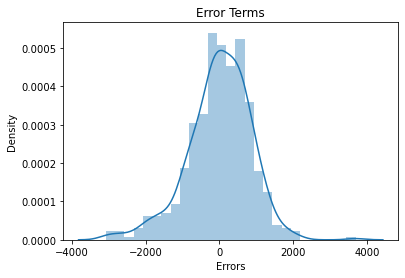

In [66]:
plot_res_dist(y_train, y_train_pred)

### Errors are normally distributed with mean value zero, and that is fine

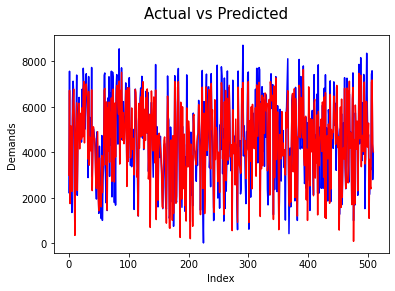

In [67]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

### Actual and Predicted result are in same pattern.so this model seems ok

In [68]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8008780387328384

### same R-square also from Residual analysis

### Homosceadacity

Text(0, 0.5, 'y_train_pred')

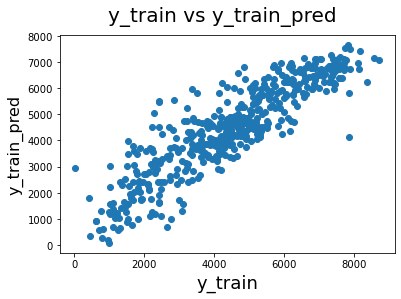

In [69]:
# Plotting y_train and y_train_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)

### Making Prediction using the final model

### Scaling the test set

In [70]:
num_vars = ['temp', 'windspeed', 'hum']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [71]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_Snow,weathersit_Mist
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.445205,0.034247,0.547945,0.569603,2.312733,-0.214917,4518.965753,0.226027,0.273973,0.219178,...,0.089041,0.095890,0.232877,0.191781,0.130137,0.082192,0.164384,0.650685,0.034247,0.315068
std,0.498699,0.182488,0.499409,0.238088,0.596005,0.072475,1849.283281,0.419697,0.447530,0.415114,...,0.285783,0.295454,0.424119,0.395057,0.337612,0.275602,0.371899,0.478395,0.182488,0.466142
min,0.000000,0.000000,0.000000,0.046591,0.887041,-0.375521,506.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.359075,1.925922,-0.268297,3422.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560248,2.232391,-0.218840,4445.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.801929,2.673474,-0.171461,5671.750000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,3.708675,0.002999,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Deviding into X_Test and y_Test

In [72]:
y_test = df_test.pop('cnt')
X_test = df_test

In [73]:
#Columns from our final model
cols = ['yr', 'holiday', 'windspeed', 'season_spring',
         'mnth_dec', 'mnth_jan',
        'mnth_nov', 'mnth_sep', 'weekday_mon','weekday_tue', 
        'weathersit_Light_Snow','weathersit_Mist']



#Predict the values for test data
y_test_pred = lr2.predict(X_test[cols])

In [74]:
r2_score(y_test, y_test_pred)

0.6035891655847728

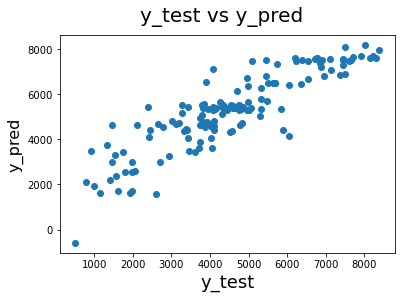

In [75]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

In [76]:
r2 =r2_score(y_test, y_test_pred)
r2

0.6035891655847728

In [77]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.5045


### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.814
- Test dataset R^2           : 0.603
- Train dataset Adjusted R^2 : 0.811    
- Test dataset Adjusted R^2  : 0.505

so it is clearly visible that there is 0.2 difference between test and train data of R-squared
and there is 0.3 difference between test and train data of adjusted R-squared
so that is very nominal and ignorable.so this model is good to go.

### Demand of bikes depend on 

- temperature
- humidity
- windspeed
- Season
- months(January, July, September, November, December)
- Year (2019)
- weathersit( Bad & Moderate)
